In [1]:
import pandas as pd
import numpy as np
from jax import jit, vmap
from functools import partial
from tqdm import tqdm
import jax.numpy as jnp 

%pylab inline
matplotlib.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 20})

wealthGrid = jnp.linspace(0, 300, 600)

Populating the interactive namespace from numpy and matplotlib


In [2]:
agentType = "richLow"
beta_r = 0.02
gamma = 4.0
from solveMDP import *

def actions(t, x, agentType = agentType, beta_r = beta_r, gamma = gamma):
    '''
        a = [c,b,k,h,action]
    '''
    return policy(beta_r, agentType, gamma, t, x)

100%|██████████| 59/59 [05:04<00:00,  5.17s/it]


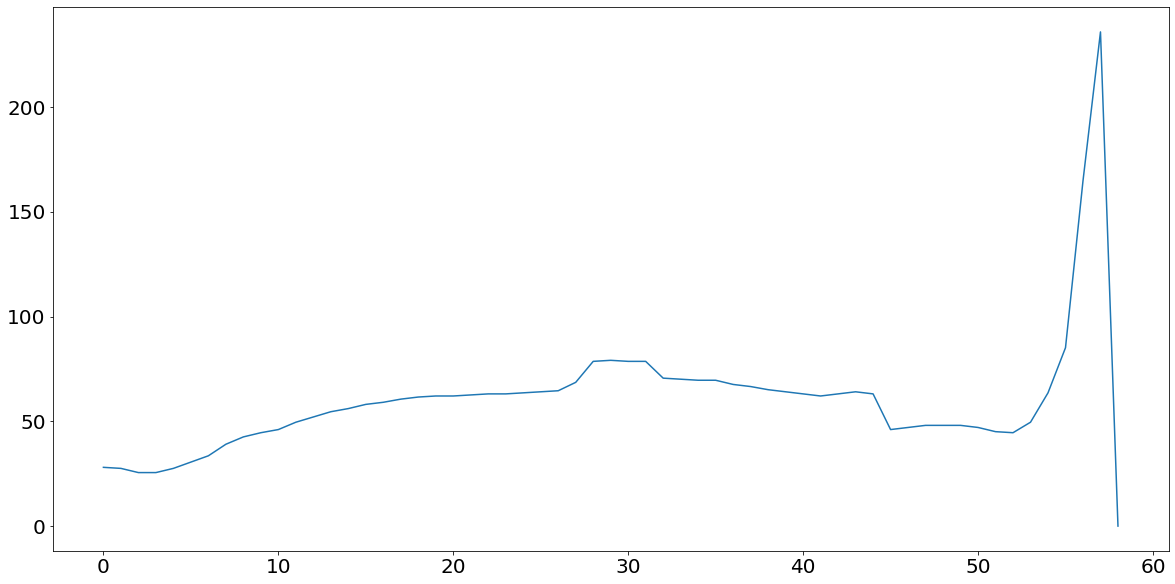

In [3]:
# participation decision boundary 
ageDependentActions = []
for t in tqdm(range(60-1)):
    
    # condition on no house, unemployed, no experience 
    ab = 0
    s = 0
    e = 0
    o = 0
    z = 0
    Xs = jnp.array([[w,ab,s,e,o,z] for w in wealthGrid]) 
    act = vmap(partial(actions,t))(Xs)
    ageDependentActions.append(act)

wealthBoundaryParticipationDecision_condition1 = [wealthGrid[jnp.argmax(act[:,2]>1)] for act in ageDependentActions]
plt.plot(range(60-1), wealthBoundaryParticipationDecision_condition1)

100%|██████████| 59/59 [04:59<00:00,  5.08s/it]


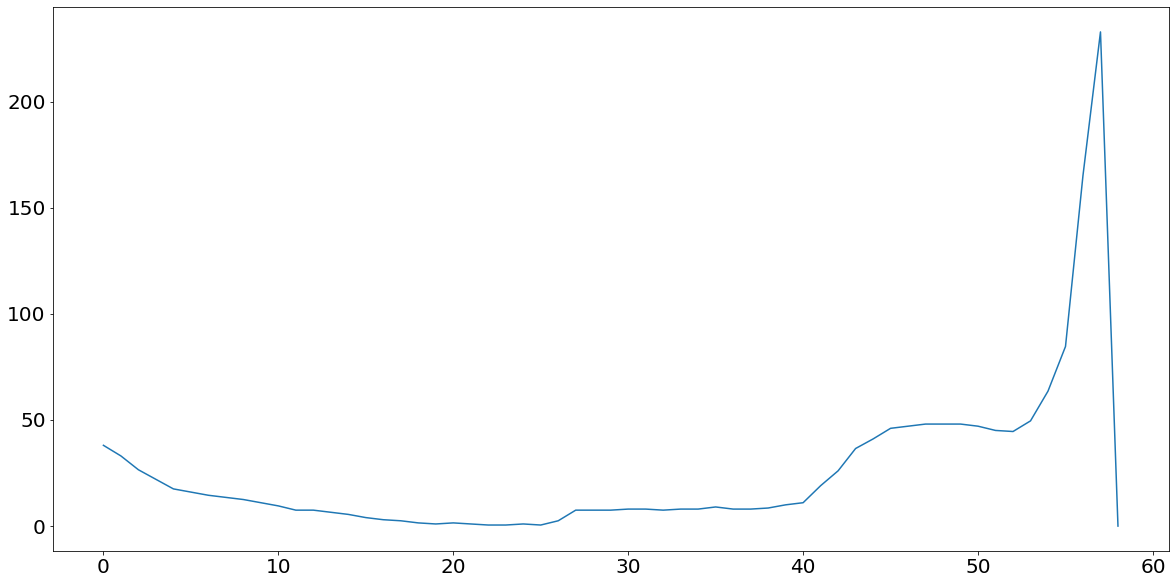

In [4]:
# participation decision boundary 
ageDependentActions = []
for t in tqdm(range(60-1)):
    
    # condition on no house, employed, no experience 
    ab = 0
    s = 0
    e = 1
    o = 0
    z = 0
    Xs = jnp.array([[w,ab,s,e,o,z] for w in wealthGrid]) 
    act = vmap(partial(actions,t))(Xs)
    ageDependentActions.append(act)

wealthBoundaryParticipationDecision_condition2 = [wealthGrid[jnp.argmax(act[:,2]>1)] for act in ageDependentActions]
plt.plot(range(60-1), wealthBoundaryParticipationDecision_condition2)

100%|██████████| 59/59 [04:59<00:00,  5.07s/it]


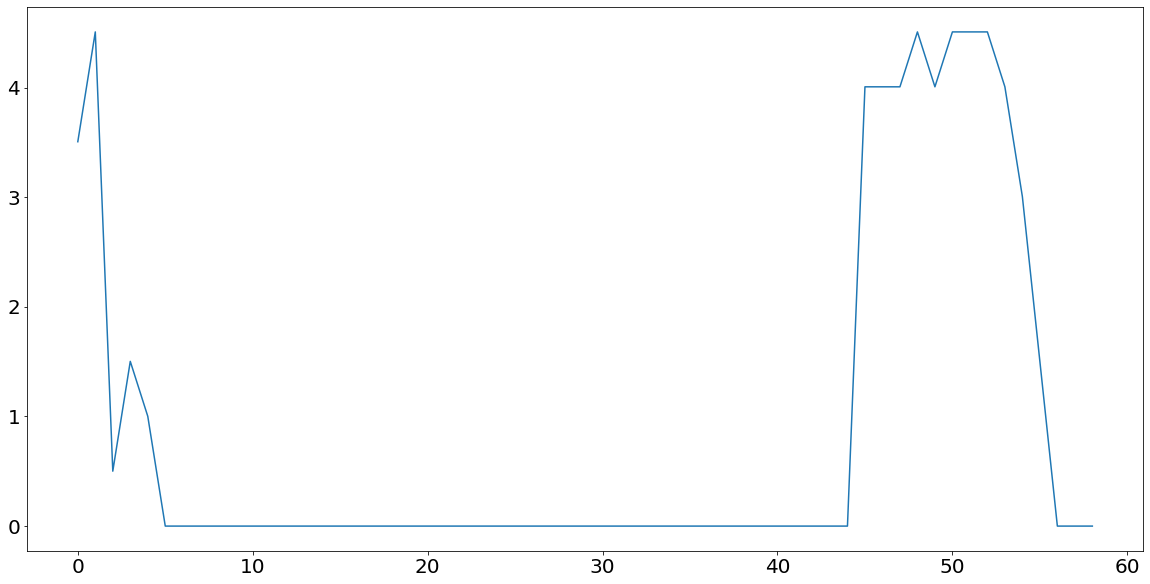

In [5]:
# participation decision boundary 
ageDependentActions = []
for t in tqdm(range(60-1)):
    
    # condition on no house, employed, experience 
    ab = 0
    s = 0
    e = 1
    o = 0
    z = 1
    Xs = jnp.array([[w,ab,s,e,o,z] for w in wealthGrid]) 
    act = vmap(partial(actions,t))(Xs)
    ageDependentActions.append(act)

wealthBoundaryParticipationDecision_condition3 = [wealthGrid[jnp.argmax(act[:,2]>1)] for act in ageDependentActions]
plt.plot(range(60-1), wealthBoundaryParticipationDecision_condition3)

100%|██████████| 59/59 [05:00<00:00,  5.09s/it]


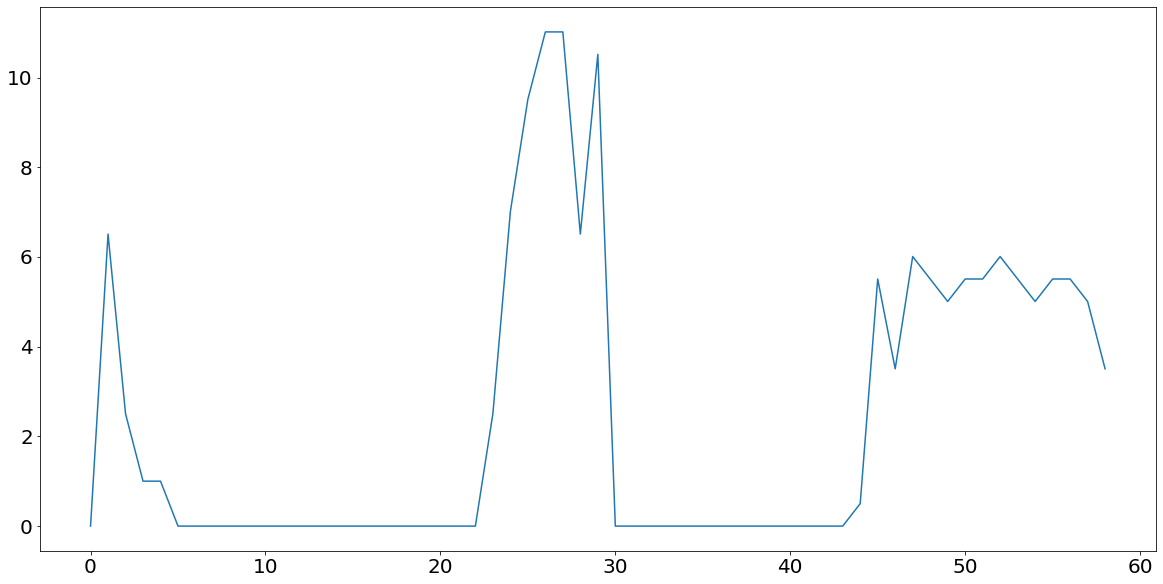

In [6]:
# participation decision boundary 
ageDependentActions = []
for t in tqdm(range(60-1)):
    
    # condition on house, employed, experience 
    ab = 0
    s = 0
    e = 1
    o = 1
    z = 1
    Xs = jnp.array([[w,ab,s,e,o,z] for w in wealthGrid]) 
    act = vmap(partial(actions,t))(Xs)
    ageDependentActions.append(act)

wealthBoundaryParticipationDecision_condition4 = [wealthGrid[jnp.argmax(act[:,2]>1)] for act in ageDependentActions]
plt.plot(range(60-1), wealthBoundaryParticipationDecision_condition4)

100%|██████████| 59/59 [05:00<00:00,  5.09s/it]


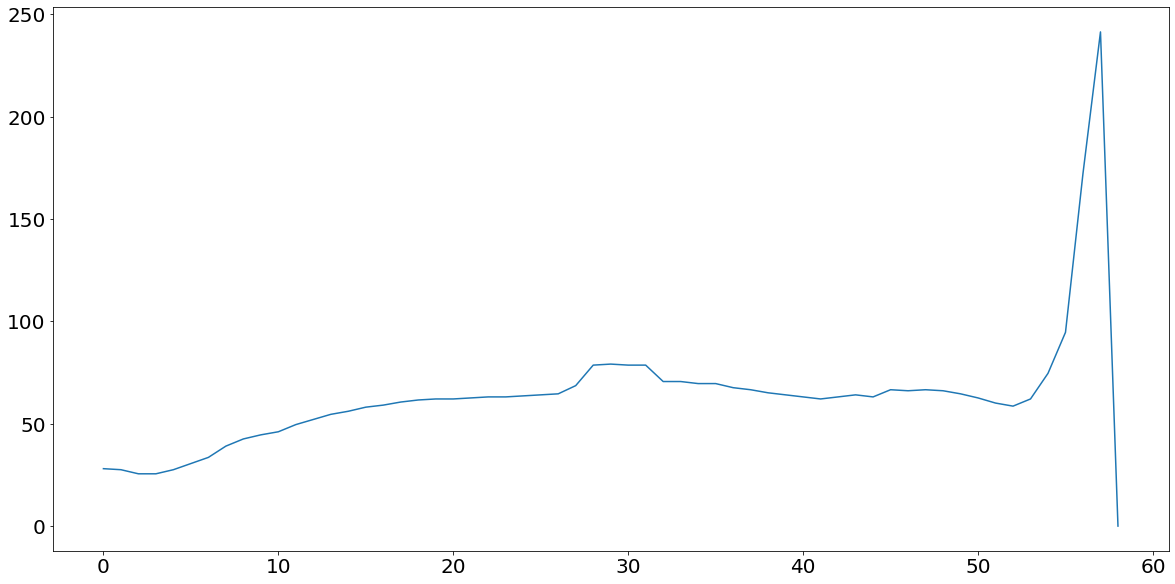

In [7]:
from shutDownRetirement.solveMDP import *

def actions(t, x, agentType = agentType, beta_r = beta_r, gamma = gamma):
    '''
        a = [c,b,k,h,action]
    '''
    return policy(beta_r, agentType, gamma, t, x)

# participation decision boundary 
ageDependentActions = []
for t in tqdm(range(60-1)):
    
    # condition on no house, unemployed, no experience 
    ab = 0
    s = 0
    e = 0
    o = 0
    z = 0
    Xs = jnp.array([[w,ab,s,e,o,z] for w in wealthGrid]) 
    act = vmap(partial(actions,t))(Xs)
    ageDependentActions.append(act)

wealthBoundaryParticipationDecision_condition5 = [wealthGrid[jnp.argmax(act[:,2]>1)] for act in ageDependentActions]
plt.plot(range(60-1), wealthBoundaryParticipationDecision_condition5)

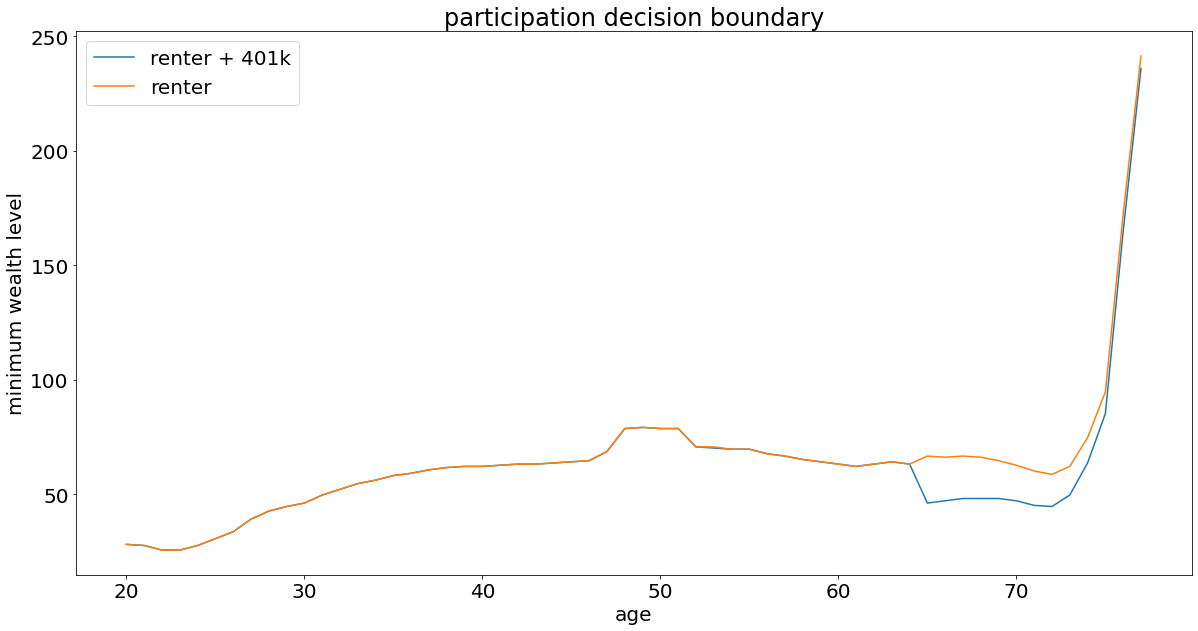

In [15]:
from matplotlib import pyplot as plt


plt.title("participation decision boundary")
plt.xlabel("age")
plt.ylabel("minimum wealth level")
plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition1[:-1], label = "renter + 401k")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition2[:-1], label = "renter + 401k + employed")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition3[:-1], label = "renter + 401k + employed + stock experience")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition4[:-1], label = "owner + 401k + employed + stock experience")
plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition5[:-1], label = "renter")
plt.legend()
plt.savefig("plots/participationDecisionBoundary1.jpg")

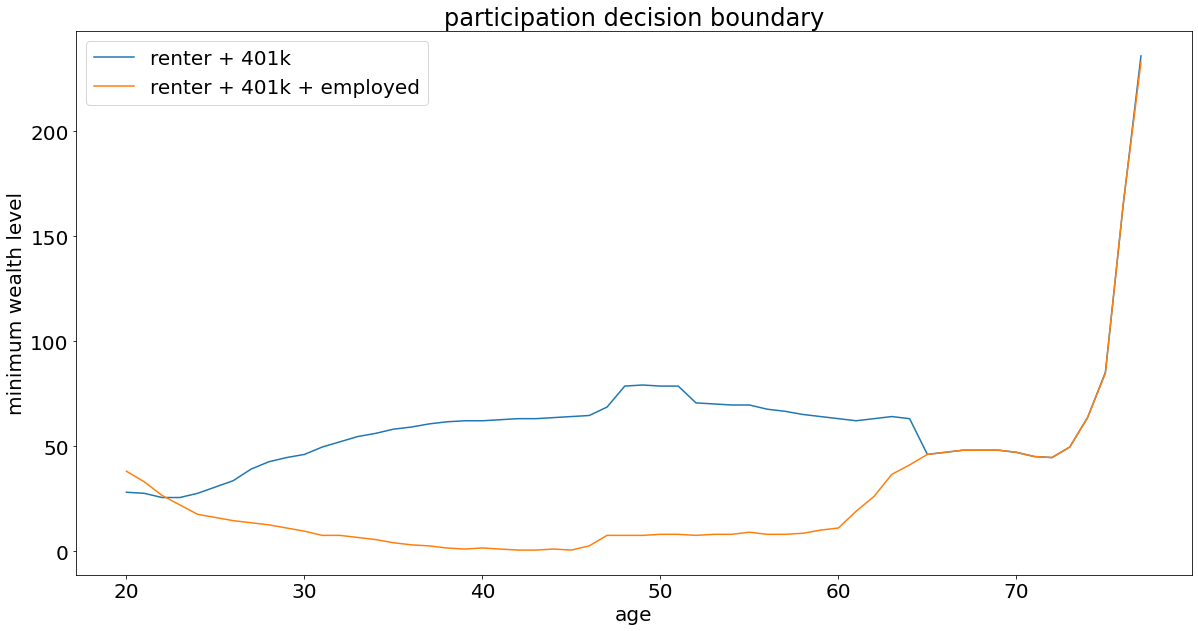

In [12]:
plt.title("participation decision boundary")
plt.xlabel("age")
plt.ylabel("minimum wealth level")
plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition1[:-1], label = "renter + 401k")
plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition2[:-1], label = "renter + 401k + employed")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition3[:-1], label = "renter + 401k + employed + stock experience")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition4[:-1], label = "owner + 401k + employed + stock experience")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition5[:-1], label = "renter")
plt.legend()
plt.savefig("plots/participationDecisionBoundary2.jpg")

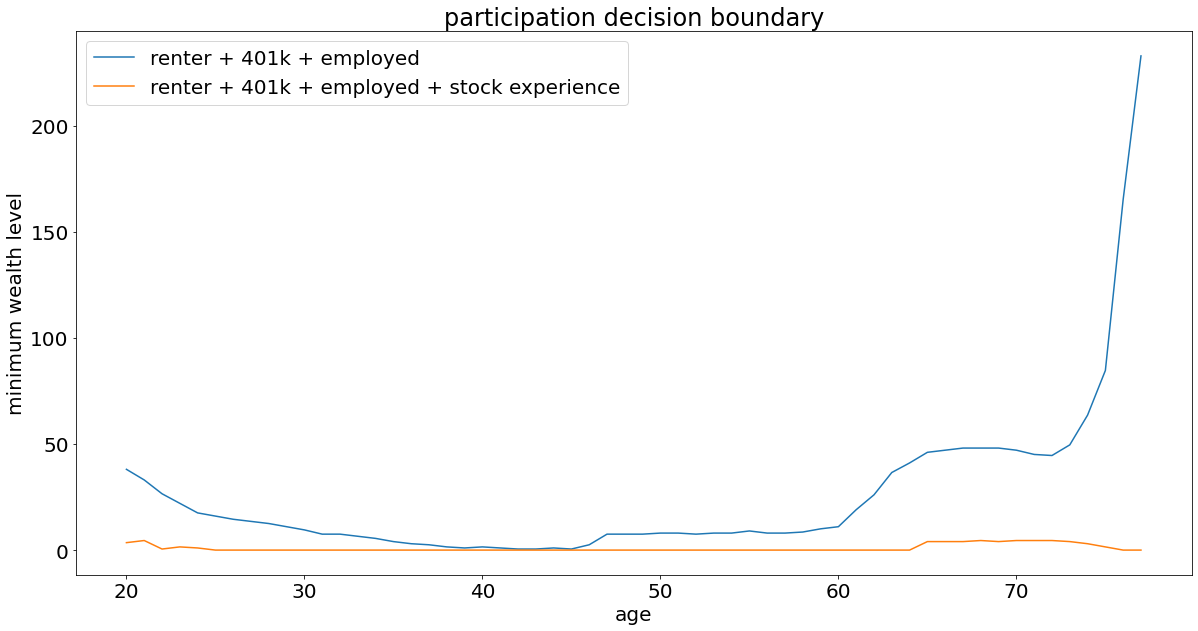

In [13]:
plt.title("participation decision boundary")
plt.xlabel("age")
plt.ylabel("minimum wealth level")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition1[:-1], label = "renter + 401k")
plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition2[:-1], label = "renter + 401k + employed")
plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition3[:-1], label = "renter + 401k + employed + stock experience")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition4[:-1], label = "owner + 401k + employed + stock experience")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition5[:-1], label = "renter")
plt.legend()
plt.savefig("plots/participationDecisionBoundary3.jpg")

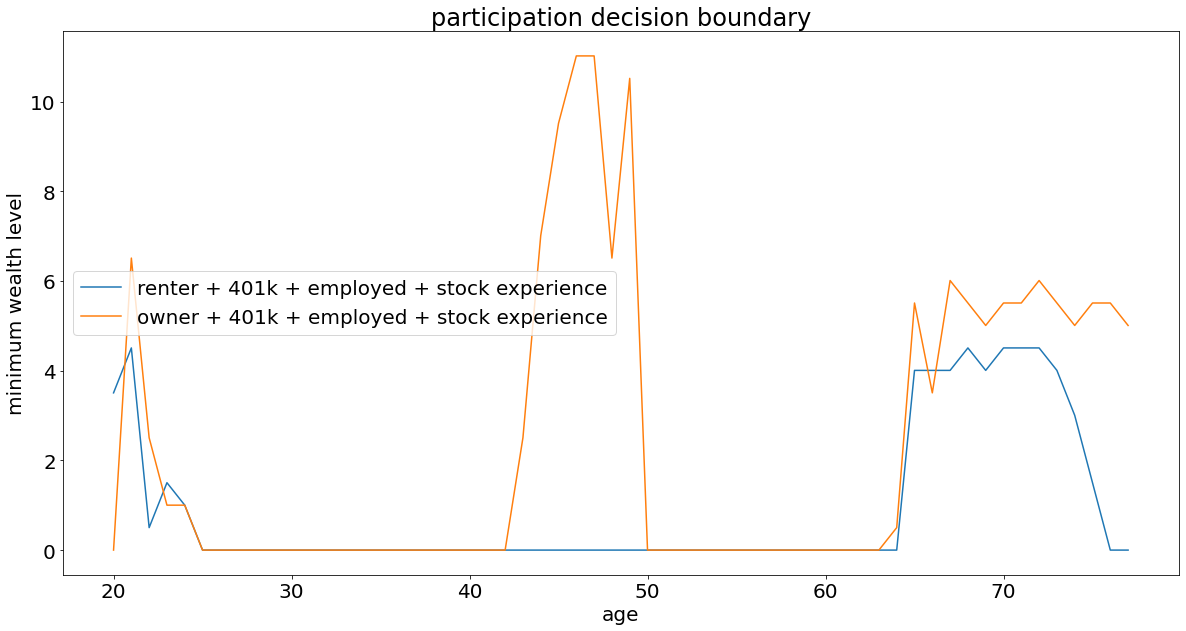

In [14]:
plt.title("participation decision boundary")
plt.xlabel("age")
plt.ylabel("minimum wealth level")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition1[:-1], label = "renter + 401k")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition2[:-1], label = "renter + 401k + employed")
plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition3[:-1], label = "renter + 401k + employed + stock experience")
plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition4[:-1], label = "owner + 401k + employed + stock experience")
# plt.plot(range(20, 20 + 60-2), wealthBoundaryParticipationDecision_condition5[:-1], label = "renter")
plt.legend()
plt.savefig("plots/participationDecisionBoundary4.jpg")